<a href="https://colab.research.google.com/github/Alba251/learning_ia/blob/regresion_lineal/regresionlinealMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalamos librerias

!pip install keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

In [3]:
#Definimos e importamos las de interés

import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Cargamos la base de datos
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

chicago_taxi_dataset.head(200)

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,05/17/2022 5:45:00 PM,05/17/2022 6:00:00 PM,17.75,821,1.13,5.0,1.703108e+10,1.703108e+10,8.0,8.0,9.00,2.06,22.9,0.0,0.0,11.06,Mobile,Blue Ribbon Taxi Association
196,05/17/2022 11:45:00 PM,05/17/2022 11:45:00 PM,23.75,414,0.57,5.0,NaN,NaN,32.0,32.0,6.00,0.00,0.0,0.0,0.0,6.00,Cash,Flash Cab
197,05/17/2022 3:45:00 PM,05/17/2022 4:00:00 PM,15.75,886,1.22,5.0,1.703108e+10,1.703184e+10,8.0,8.0,9.00,0.00,0.0,0.0,0.0,9.00,Cash,City Service
198,05/17/2022 5:00:00 PM,05/17/2022 5:15:00 PM,17.00,1219,1.68,5.0,1.703183e+10,1.703108e+10,28.0,8.0,9.00,2.07,23.0,0.0,0.0,11.07,Mobile,Sun Taxi


In [ ]:
#Presentamos todos los datos


In [5]:
#Hacemos un resumen de los datos separando entre variables cualitativas y cuantitativas

data_quantitative = chicago_taxi_dataset.drop(['COMPANY', 'PAYMENT_TYPE', 'TRIP_START_TIMESTAMP','TRIP_END_TIMESTAMP'],axis = 1).describe()
print('Quantitative data: ',data_quantitative)

data_qualitative = chicago_taxi_dataset[['COMPANY', 'PAYMENT_TYPE', 'TRIP_START_TIMESTAMP','TRIP_END_TIMESTAMP']].describe()
print('Qualitative data:', data_qualitative)


Quantitative data:         TRIP_START_HOUR  TRIP_SECONDS    TRIP_MILES    TRIP_SPEED  \
count     31694.000000  31694.000000  31694.000000  31694.000000   
mean         14.185635   1319.796397      8.289463     20.256544   
std           5.159454    928.932873      7.265672     11.110390   
min           0.000000     60.000000      0.500000      4.000000   
25%          10.500000    548.000000      1.720000     11.000000   
50%          14.750000   1081.000000      5.920000     17.600000   
75%          18.000000   1888.000000     14.500000     27.500000   
max          23.750000   7140.000000     68.120000     64.800000   

       PICKUP_CENSUS_TRACT  DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  \
count         1.325900e+04          1.402300e+04           28477.000000   
mean          1.703153e+10          1.703140e+10              35.562138   
std           3.827747e+05          3.408106e+05              26.421367   
min           1.703102e+10          1.703101e+10               1.00

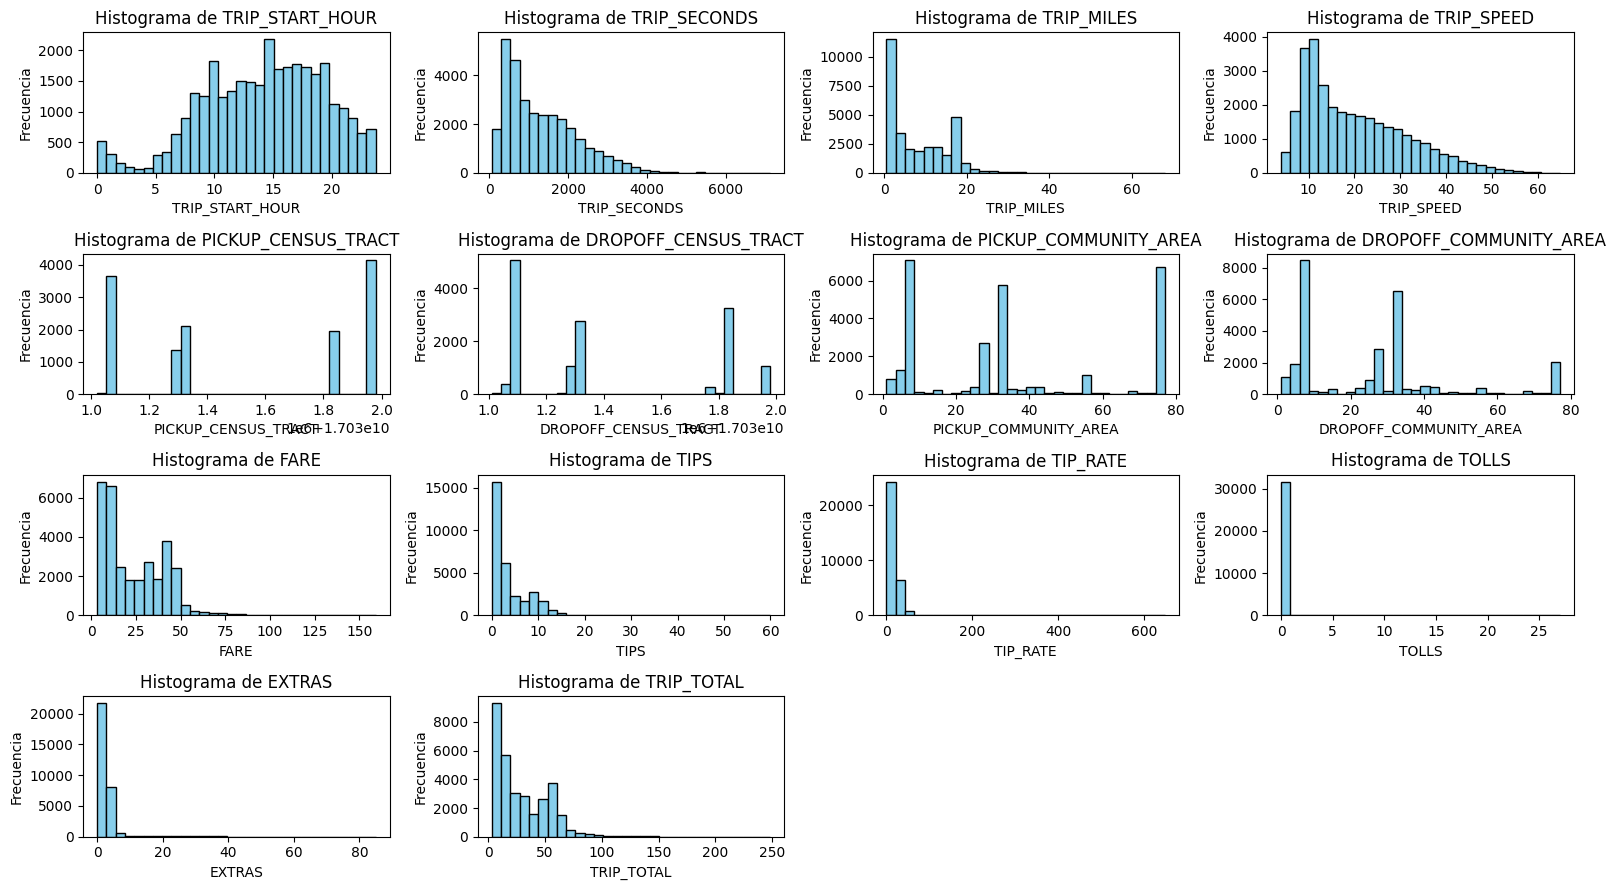

In [26]:
#Ploteado de los datos cuantitativos para ver el tipo de distribución
# Lista de las variables cuantitativas que quieres plotear
variables = chicago_taxi_dataset.drop(['COMPANY', 'PAYMENT_TYPE', 'TRIP_START_TIMESTAMP','TRIP_END_TIMESTAMP'],axis = 1).columns
# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 9))  # Ajusta filas/columnas/figsize según cuántas tengas

axes = axes.flatten()

for i, var in enumerate(variables):
    axes[i].hist(chicago_taxi_dataset[var].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes sobrantes si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # <-- Esto evita que se solapen
plt.show()